# GRIP - Spark Foundation

## Data Science and Business Analytics Internship

# Task - 1 : Predict the percentage of an student based on the no. of study hours.

## By : Vijay Devkate

# Problem Satement :

## we need to Predict the percentage of an student based on the no. of study hours.

## Project Objectives :

### - Make use of Linear Regression Algorthim 
### - Predict the score if student studies for 9.25 hrs/day

# The Following is the project code : 

## Import Libraries

In [1]:
# import the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
#Importing and reading the data

data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
# Checking for the shape of the data

data.shape

(25, 2)

In [8]:
# Describing the data

data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
# Checking data information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [10]:
# Checking for null values

data.isnull().sum()

# No null values present

Hours     0
Scores    0
dtype: int64

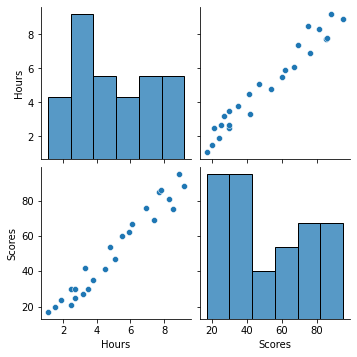

In [11]:
# Data Visualization

sns.pairplot(data)
plt.show()

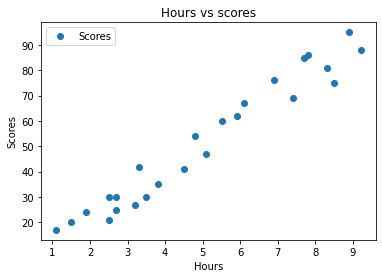

In [12]:
# Checking the realtion between scores and hours

data.plot(x = 'Hours', y = 'Scores', style = 'o')
plt.title("Hours vs scores")
plt.xlabel("Hours")
plt.ylabel("Scores")

plt.show()

In [13]:
#Dviding data into input "attributes" and ouput "labels"

x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [14]:
# Spliting the data into training and testing data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3)
print(x_train.shape)
print(x_test.shape)

(17, 1)
(8, 1)


In [15]:
# Training Algorthim

from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR = LR.fit(x_train,y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

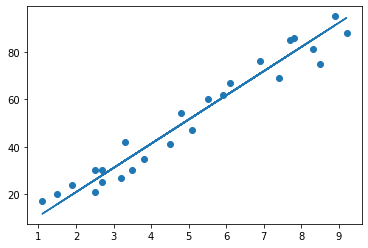

In [16]:
# Plotting for regression line

line = LR.coef_*x+LR.intercept_

#Plotting for test data

plt.scatter(x,y)
plt.plot(x,line);
plt.show()

In [17]:
print(x_test)

# Predicting scores

y_pred = LR.predict(x_test)

[[8.5]
 [3.8]
 [3.3]
 [7.4]
 [2.7]
 [4.8]
 [7.8]
 [1.1]]


In [18]:
# Comparing Actual and Predicted score

df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
0,75,87.181034
1,35,39.212355
2,42,34.109304
3,69,75.954322
4,25,27.985642
5,54,49.418457
6,86,80.036762
7,17,11.655879


In [19]:
# finding out mean absolute error and r2 values

from sklearn import metrics
print("Mean absolute error:" , metrics.mean_absolute_error(y_test,y_pred))
print("R-squared:", metrics.r2_score(y_test,y_pred))

Mean absolute error: 6.264118817804266
R-squared: 0.9137715344448629


In [20]:
# Finding the scores for studied hour 9.25

hours = 9.25
new_pred = LR.predict([[hours]])
print("Number of hours = {}".format(hours))
print("Predicted percentage score = {}".format(new_pred[0]))

Number of hours = 9.25
Predicted percentage score = 94.83561025275245
